# Tracé d'un histogramme en python
À partir de données de mesures de la valeur de g  - collecte des valeurs mesurées par des groupes de TP pendant plusieurs années à partir d'une même vidéo de chute libre - tracé d’un histogramme des valeurs.

On calculera la moyenne et l’écart type, ainsi que le Z score


## Imporations
On importe les deux bibliothèques nécessaires pour tracert l'histogramme d'une série de valeurs : 

***numpy*** pour les calculs

***pyplot*** de ***matplotlib*** pour le tracé

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Récupératrion des données
Récupération des données stockées dans un fichier ***.CSV***

Après ouverture du fichier contenant les données (**g_data.csv**), on stocke les valeurs de g dans une variable de type liste. 

On récupère aussi les deux premières lignes qui contiennent le nom de la grandeur (dans la variable **gradeur**) et l’unité (variable **unité**). Ces deux variables serviront pour l’affichage.


In [18]:
fichier=open('g_data.csv','r') #ouverture du fichier pour le rendre lisible
data=fichier.readlines() #copie du contenu du fihier dans une variable 'data'
fichier.close() #fermeture du fichier
N=len(data) #création d'une variable 'N' dont la valeur est égale au nombre de lignes du fichier


g=(N-2)*[0] # création de la variable de type liste qui contiendra les valeurs de g
grandeur = data[0] # récupération du nom de la grandeur (1ere ligne du fichier csv)
unité = data[1] # récupération de l'unité (2e ligne du fichier csv)

#la boucle va copier au fur et à mesure les données d'une ligne dans la variable g
for i in range(2,len(data)): #les deux premières lignes ne contiennent pas de données
    data[i]=data[i].replace(',','.') # remplace les virgules du fichier d'origine par des points
    g[i-2]=eval(data[i])# copies des valeurs contenues dans data vers la variable g[]

## Tracé de l'histogramme
On va dans un premier temps déterminer le nombre de classes N pour le tracé de l'histogramme. Il n'y a pas de valeur obligatoire mais le nombre entier le plus proche de la racine carrée de la population est une valeur qui donne généralement de bons résultats

Ici la population est de 331 soit 18 classes pour cet histogramme 
$$ \sqrt{331}=18,19 $$

Le module pyplot contient une fonction plt.hist qui reçoit pour arguments la liste (ici g[ ]), le nombre de classes N et des arguments optionnels d'affichage et renvoie directement l’histogramme

On calcule aussi la valeur moyenne, l'écart type et le Z Score.


population = 332    Nombre de classes = 18
moy = 9.81343    uc = 0.00853002   Z_Score = 0.402547


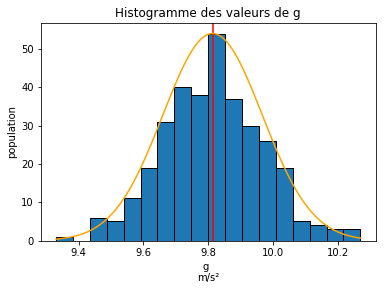

In [19]:
valRef = 9.81 #on fixe la valeur de référence

N=int(np.sqrt(len(g))) #calcul du nombre de classes de l'histogramme

plt.clf #efface la figure existante

n = plt.hist(g,bins=N, ec='black') #fabrication de l'histogramme de g avec N classes (bins) 

plt.xlabel(grandeur+ unité) # nom de la grandeur en abscisses 
plt.ylabel('population') # nom de la grandeur en ordonnées 
plt.title("Histogramme des valeurs de g") #affichage du titre


g_min=min(g) #enregistrement des valeurs minimum et maximum de g
g_max=max(g) #necessaire à l'affichage optionnel

g=np.array(g) #transformation de g en variable de type tableau pour simplifier les calculs
moy=g.mean() # calcul de la moyenne mean() est une méthode associée au type np.array
uc=g.std(ddof=1)/np.sqrt(len(g))# calcul de l'écart type
zScore = abs((moy-valRef)/uc) # calcul du Z score



#affichage des valeurs numériques

print('population =',len(g),'   Nombre de classes =',N)
print('moy = {0:G}'.format(moy) , '   uc = {0:G}'.format(uc), '  Z_Score = {0:G}'.format(zScore))



#---------------------------------options d'affichage------------------------------------
plt.axvline(x=moy, color='red') #affichage d'une ligne verticale à la moyenne calculée

#tracé de la gaussienne ayant les mêmes caractéristiques de moyenne et d'écart type
x = np.linspace(g_min, g_max, 100)
y = scipy.stats.norm.pdf(x,moy,uc*N)
plt.plot(x,y/max(y)*max(n[0]), color='orange')
#----------------------------------------------------------------------------------------


plt.show()







